In [1]:
import pandas as pd
from prophet import Prophet
from plotnine import *

# Data Loading

In [2]:
df=pd.read_csv('/home/ubuntu/code/prophet/examples/example_wp_log_R.csv')
print(df.shape)
print(df.dtypes)
df.head(5)

(2863, 2)
ds     object
y     float64
dtype: object


,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


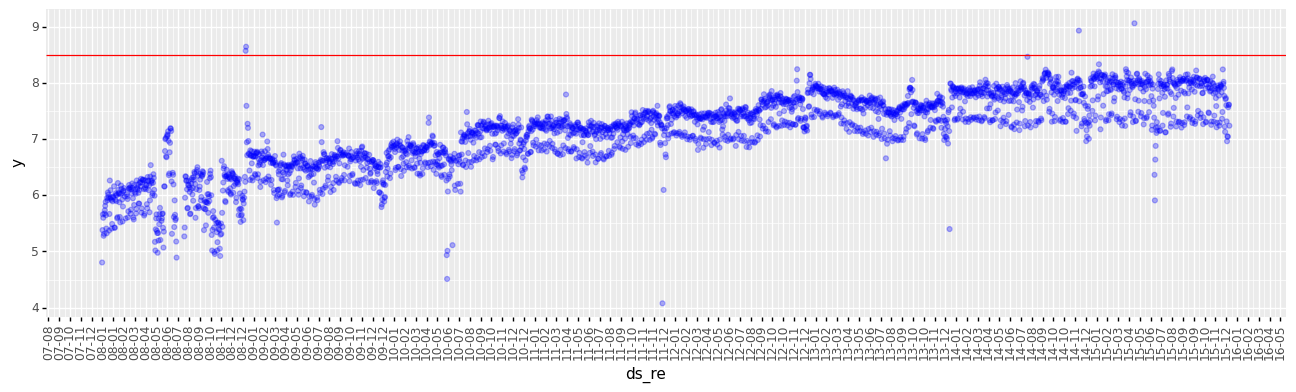

<ggplot: (8756350362751)>


In [19]:
## Viz
print(
    ggplot(df.assign(ds_re=lambda x:pd.to_datetime(x.ds,format='%Y-%m-%d')),
           aes('ds_re','y'))
    +geom_point(color='blue',alpha=0.3)
    +scale_x_datetime(date_breaks='28 days',date_labels='%y-%m')
    +theme(axis_text_x=element_text(angle=90),figure_size=(16,4))
    +geom_hline(yintercept=8.5,color='red')

)

# 01 Forecasting Growth 

## Processing

In [20]:
## Specify cap
df.loc[:,'cap']=8.5
print(df.ds.min(),df.ds.max())
df.head(5)

2008-01-01 2015-12-31


,ds,y,cap
0,2008-01-30,5.976351,8.5
1,2008-01-16,6.049733,8.5
2,2008-01-17,6.011267,8.5
3,2008-01-14,5.953243,8.5
4,2008-01-15,5.910797,8.5


## Fitting 

In [17]:
# logistic growth
m=Prophet(growth='logistic')
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Prediction 

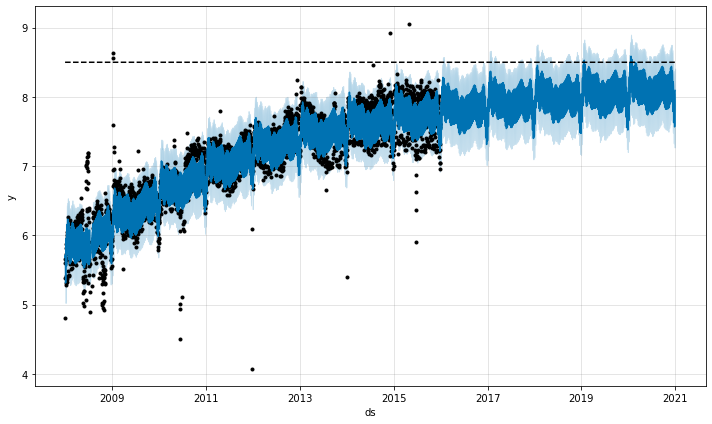

In [21]:
future=m.make_future_dataframe(periods=1826) # forecast 5 years into the future
future.loc[:,'cap']=8.5
fcst=m.predict(future)
fig=m.plot(fcst)

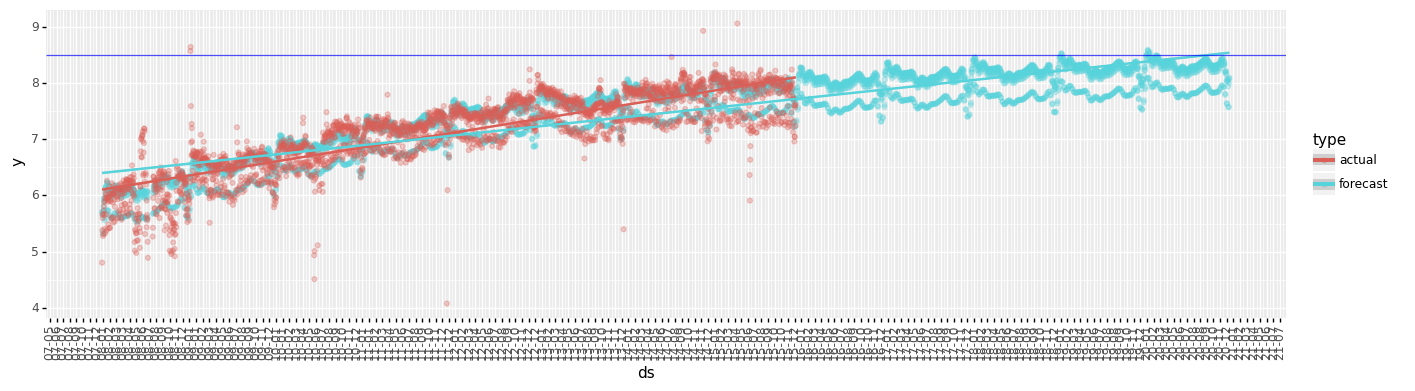

<ggplot: (8756357497881)>


In [29]:
## Viz
temp_df=pd.concat([fcst.loc[:,['ds','yhat']].rename(columns={'yhat':'y'}).assign(type='forecast'),
                   df.assign(ds=lambda x:pd.to_datetime(x.ds,format='%Y-%m-%d'),
                             type='actual').loc[:,['ds','y','type']]],
                  axis=0)
print(
    ggplot(temp_df,aes('ds','y',color='type'))
    +geom_point(alpha=0.3)
    +geom_smooth(span=0.3)
    +scale_x_datetime(date_breaks='28 days',date_labels='%y-%m')
    +theme(axis_text_x=element_text(angle=90),figure_size=(16,4))
    +geom_hline(yintercept=8.5,color='blue',alpha=0.7)
    )

# 02 Saturating Minimum

## Processing

In [31]:
## Current
df_1=df.copy()
df_1.loc[:,'y']=10-df_1.y
df_1.loc[:,'cap']=6
df_1.loc[:,'floor']=1.5
## future
future.loc[:,'cap']=6
future.loc[:,'floor']=1.5

## Fit 

In [32]:
m=Prophet(growth='logistic')
m.fit(df_1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Predict

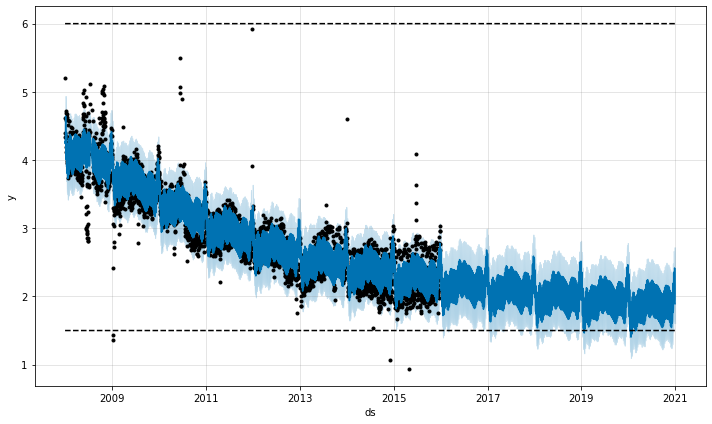

In [34]:
fcst_1=m.predict(future)
fig_1=m.plot(fcst_1)

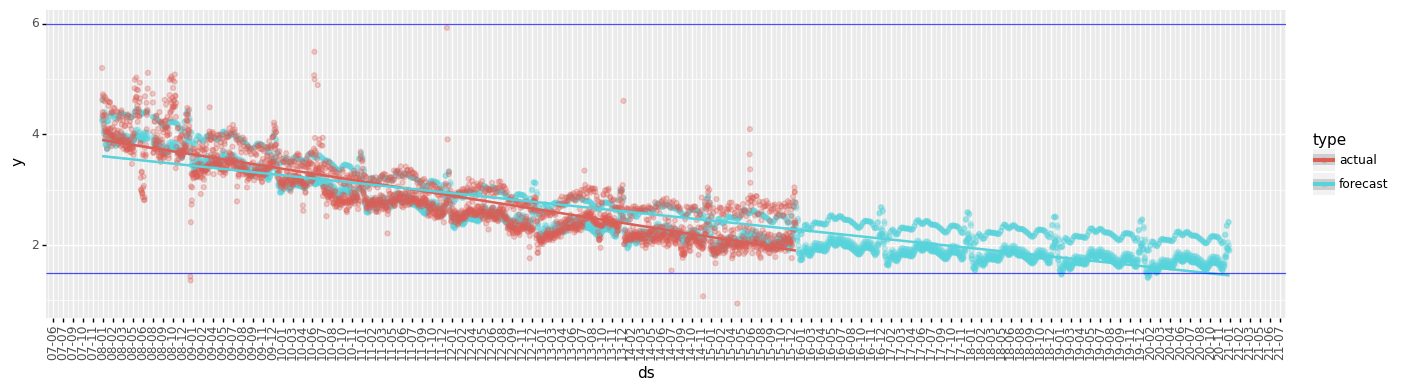

<ggplot: (8756357479406)>


In [37]:
## Viz
temp_df_1=pd.concat([fcst_1.loc[:,['ds','yhat']].rename(columns={'yhat':'y'}).assign(type='forecast'),
                     df_1.assign(ds=lambda x:pd.to_datetime(x.ds,format='%Y-%m-%d'),
                                 type='actual'
                                ).loc[:,['ds','y','type']]],
                   axis=0)
print(
    ggplot(temp_df_1,aes('ds','y',color='type'))
    +geom_point(alpha=0.3)
    +geom_smooth(span=0.3)
    +scale_x_datetime(date_breaks='42 days',date_labels='%y-%m')
    +theme(axis_text_x=element_text(angle=90),figure_size=(16,4))
    +geom_hline(yintercept=[1.5,6],color='blue',alpha=0.7)
    )